<a href="https://colab.research.google.com/github/Shabbarsyed/Cash-Ratio-Analysis/blob/main/Sentiment_Analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [1]:
!pip install tensorflow
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Moviereview/IMDB Dataset.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.shape

(50000, 2)

# Data Pre-Processing

In [6]:
data.isnull().any()

review       False
sentiment    False
dtype: bool

In [7]:
data['review'][4]

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case wit

# *Removing '<--->' Tag*
### Using Regular Expression we remove (<--><-->) type tags

In [8]:
 Tag = re.compile(r'<[^>]+>')

 def remove(text):
  return Tag.sub('', text)

In [9]:
new='''Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei\'s direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work'''

remove(new)

'Petter Mattei\'s "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. This being a variation on the Arthur Schnitzler\'s play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we 

# *Filtering important words*
### Removing unimportant characters, numbers, spaces... etc using Regular Expression

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def preprocess(sen):
     sentence = sen.lower()

     # Remove html tags
     sentence = remove(sentence)

     # Remove punctuations and numbers
     sentence = re.sub('[^a-zA-Z]', ' ', sentence)

     # Single character removal
     sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

     # Remove multiple spaces
     sentence = re.sub(r'\s+', ' ', sentence)

     # Remove Stopwords
     pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
     sentence = pattern.sub('', sentence)

     return sentence

In [12]:
preprocess(new)

'petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work'

# Getting Trainable Data

In [13]:
X = []
sentences = list(data['review'])
for sen in sentences:
    X.append(preprocess(sen))

In [14]:
X[4]

'petter mattei love time money visually stunning film watch mr mattei offers us vivid portrait human relations movie seems telling us money power success people different situations encounter variation arthur schnitzler play theme director transfers action present time new york different characters meet connect one connected one way another next person one seems know previous point contact stylishly film sophisticated luxurious look taken see people live world live habitat thing one gets souls picture different stages loneliness one inhabits big city exactly best place human relations find sincere fulfillment one discerns case people encounter acting good mr mattei direction steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talented cast make characters come alive wish mr mattei good luck await anxiously next work '

In [15]:
Y = data['sentiment']

Y = np.array(list(map(lambda x: 1 if x=="positive" else 0, Y)))

# Using Train Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Tokenizing Words into numerical sequences

In [17]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [18]:
vocab_length = len(word_tokenizer.word_index)+1
vocab_length

92394

# Padding

In [19]:
max_len=100
X_train=pad_sequences(X_train, padding='post',maxlen=max_len)
X_test=pad_sequences(X_test, padding='post',maxlen=max_len)

# Creating Embedding Matrix
### *using pre-trained GloVe Model (Download from GloVe Website)*

In [20]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Moviereview/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [21]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


embedding_matrix.shape

(92394, 100)

# RNN Model Building

In [22]:
rnn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

rnn_model.add(embedding_layer)
rnn_model.add(SimpleRNN(128))

rnn_model.add(Dense(1, activation='sigmoid'))

In [23]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9239400   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9268841 (35.36 MB)
Trainable params: 29441 (115.00 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


In [24]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Training RNN Model

In [25]:
rnn_model_history = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 16s 63ms/step - loss: 0.6898 - acc: 0.5430 - val_loss: 0.6774 - val_acc: 0.5516
Epoch 2/10
250/250 [==============================] - 15s 60ms/step - loss: 0.6771 - acc: 0.5550 - val_loss: 0.6558 - val_acc: 0.5786
Epoch 3/10
250/250 [==============================] - 14s 58ms/step - loss: 0.6654 - acc: 0.5695 - val_loss: 0.6575 - val_acc: 0.5850
Epoch 4/10
250/250 [==============================] - 14s 57ms/step - loss: 0.6732 - acc: 0.5644 - val_loss: 0.6791 - val_acc: 0.5454
Epoch 5/10
250/250 [==============================] - 15s 60ms/step - loss: 0.6696 - acc: 0.5612 - val_loss: 0.6765 - val_acc: 0.5606
Epoch 6/10
250/250 [==============================] - 14s 56ms/step - loss: 0.6546 - acc: 0.5816 - val_loss: 0.8417 - val_acc: 0.5065
Epoch 7/10
250/250 [==============================] - 14s 57ms/step - loss: 0.6647 - acc: 0.5798 - val_loss: 0.6526 - val_acc: 0.6302
Epoch 8/10
250/250 [==============================] - 14s 56ms

# Evaluating RNN Model on test data

In [26]:
rnn_score = rnn_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", rnn_score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.6625 - acc: 0.5709
Test Accuracy: 0.570900022983551


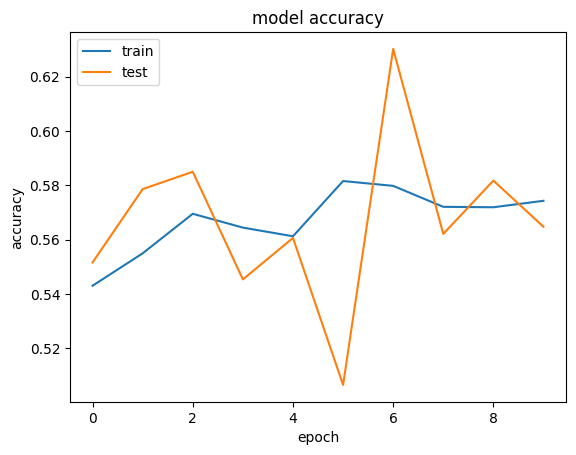

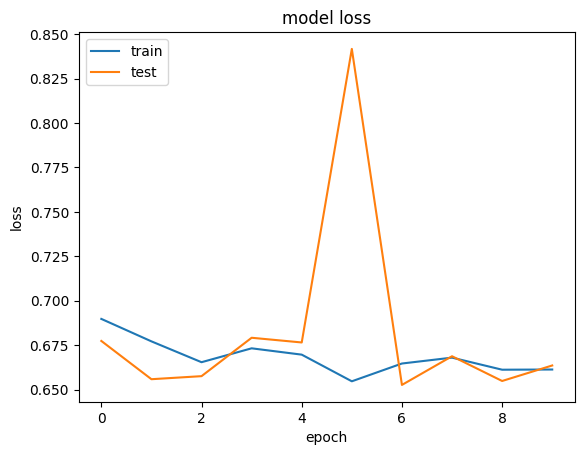

In [27]:
plt.plot(rnn_model_history.history['acc'])
plt.plot(rnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(rnn_model_history.history['loss'])
plt.plot(rnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# LSTM Model Building

In [28]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [29]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9239400   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9356777 (35.69 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9239400 (35.25 MB)
_________________________________________________________________


# Training LSTM Model

In [30]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [31]:
lstm_model_history = lstm_model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 46s 178ms/step - loss: 0.4995 - acc: 0.7569 - val_loss: 0.4192 - val_acc: 0.8127
Epoch 2/10
250/250 [==============================] - 44s 176ms/step - loss: 0.4207 - acc: 0.8128 - val_loss: 0.3831 - val_acc: 0.8346
Epoch 3/10
250/250 [==============================] - 45s 179ms/step - loss: 0.3755 - acc: 0.8362 - val_loss: 0.3621 - val_acc: 0.8489
Epoch 4/10
250/250 [==============================] - 44s 175ms/step - loss: 0.3449 - acc: 0.8537 - val_loss: 0.3265 - val_acc: 0.8605
Epoch 5/10
250/250 [==============================] - 44s 174ms/step - loss: 0.3241 - acc: 0.8636 - val_loss: 0.3428 - val_acc: 0.8625
Epoch 6/10
250/250 [==============================] - 44s 177ms/step - loss: 0.3071 - acc: 0.8725 - val_loss: 0.3120 - val_acc: 0.8649
Epoch 7/10
250/250 [==============================] - 45s 179ms/step - loss: 0.2850 - acc: 0.8823 - val_loss: 0.3118 - val_acc: 0.8744
Epoch 8/10
250/250 [==============================] - 4

# Evaluating LSTM Model on test Data

In [32]:
lstm_score = lstm_model.evaluate(X_test, Y_test, verbose=1)
print("Test Accuracy:", lstm_score[1])

313/313 [==============================] - 8s 27ms/step - loss: 0.3246 - acc: 0.8615
Test Accuracy: 0.8615000247955322


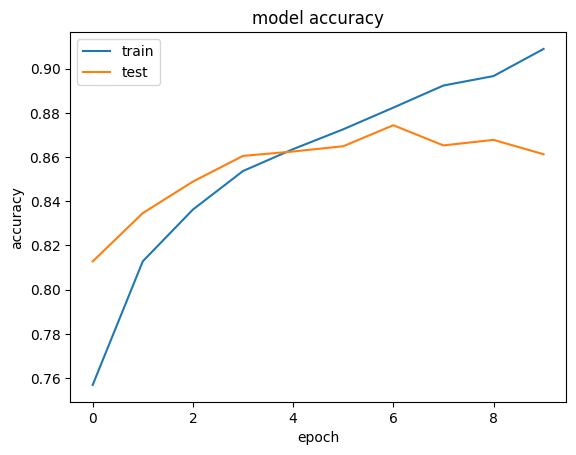

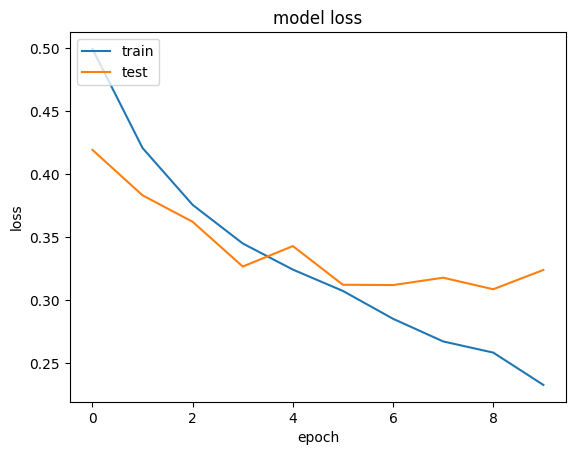

In [33]:
plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



*   RNN Model Gives around 55% accuracy
*   LSTM Model gives around 87% accuracy

LSTM models outperform simple RNNs due to their ability to capture long-term dependencies through memory cells and gating mechanisms, mitigating the vanishing gradient problem.
